In [2]:
%reload_ext autoreload
%autoreload 2
os.chdir("..")
import toml
from core.dl_framework.utils import read_config

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%%bash 
pwd

/content/Template_Project


In [4]:

from core.dl_framework.utils import get_specific_history
from core.dl_framework.utils import plot_history, plot_history_all

In [5]:
from torchvision.datasets import ImageFolder
filespath = "./tmp_files/seg_train/seg_train"
data = ImageFolder(filespath)


In [54]:
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
from pathlib import Path
from torchvision import transforms
import torch
from core.dl_framework.model import Model_CNN
import torch.nn.functional as F
from tqdm import tqdm 
class CustomDataset(Dataset):
    def __init__(self, data_path, transform=[]):
        self.data_path = data_path
        self.transform = transform
        self.all_imgs =  [p for p in Path(data_path).rglob("*.jpg") if p.is_file()]
        classes = [p.name for p in Path(data_path).glob("*")]
        self.class_to_label = dict(zip(classes, range(len(classes))))
        
    def __len__(self):
        return len(self.all_imgs)
    def __getitem__(self, idx):
        image = Image.open(all_imgs[idx])
        if transform:
            image = transforms.Compose(self.transform)(image)
        label = all_imgs[idx].parent.name
        label = self.class_to_label[label]
        return image, label

train_ds = CustomDataset("tmp_files/seg_train/seg_train", [transforms.Resize((124,124)), transforms.ToTensor()])
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Model_CNN(3, 6)
model = model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-05)

criterion = F.cross_entropy

epochs = 100
for epoch in range(epochs):
    outstring = f""
    pbar = tqdm(train_dl, total=len(train_dl))
    train_loss = 0
    model.train()
    for xb, yb in pbar:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        train_loss += loss.item() * xb.size(0)
        opt.step()
        opt.zero_grad()
    train_loss  /= len(train_dl)
    outstring += f"train_loss: {train_loss}\t"
    
    model.eval()
    pbar = tqdm(test_dl, total=len(test_dl))
    
    valid_loss = 0
    correct = 0
    for xb, yb in pbar:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out, yb)
        valid_loss += loss.item() * xb.size(0)
        _, batch_pred = torch.max(out.data, 1)
        correct += (batch_pred == yb).sum().item() / yb.size(0)
    valid_loss /= len(test_dl)
    correct /= len(test_dl)
    outstring += f"valid_loss: {valid_loss}\t"
    outstring += f"valid_acc: {correct}\t"
    
        #     _, batch_pred = torch.max(self.out.data, 1)
        # batch_correct = (batch_pred == self.yb).sum().item() / len(self.yb)
    print(outstring)
# fig, ax = plt.subplots(figsize=(16, 16))

 40%|████      | 89/220 [00:10<00:15,  8.30it/s]


KeyboardInterrupt: 

In [ ]:
import torch
b = torch.Tensor(14034, 3, 150, 150)
torch.cat(files, out=b)

In [11]:
from core.dl_framework.learner import Learner
from core.dl_framework.callbacks import Recorder, EarlyStopping, Checkpoints
from core.dl_framework.data import get_dataset, Dataset, DataLoader, split_data
from torchvision import transforms
config_file = toml.load("configs/default_train_config.toml")
setup_config = read_config(config_file)
# bs = setup_config["h_batch_size"]
# x_train, y_train, x_test, y_test = get_dataset(setup_config["s_source"], setup_config["s_set"], setup_config["p_tmp_data_path"], CNN=True)

# train_ds, test_ds =  Dataset(x_train, y_train), Dataset(x_test, y_test)
# # train_dl, test_dl = DataLoader(train_ds, bs), DataLoader(test_ds, bs)
# learn = Learner(train_ds, setup_config)
# learn.fit(20)
from torchvision import transforms
import torch
from tqdm import tqdm
# from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from core.dl_framework.model import Model_CNN
import torch.nn.functional as F
# from core.dl_framework.data import Dataset, DataLoader
batch_size = setup_config["h_batch_size"]
transform_keys = [t for t in setup_config if "s_t_" in t]
transform_funcs = [t.split("_", 2)[-1] for t in transform_keys]
transform_args = [setup_config[t] for t in transform_keys]
transform_list = []
for func, arg in zip(transform_funcs, transform_args):
    if func != "ToTensor":
        transform_list.append(getattr(transforms, func)(arg))
    else:
        transform_list.append(getattr(transforms, func)())
transform = transforms.Compose(transform_list)


# train_data = ImageFolder(root="./tmp_files/seg_train/seg_train", transform=transform)
# test_data = ImageFolder(root="./tmp_files/seg_test/seg_test", transform=transform)

train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Model_CNN(3, len(train_data.classes))
model = model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-05)

criterion = F.cross_entropy

epochs = 100
for epoch in range(epochs):
    outstring = f""
    pbar = tqdm(train_dl, total=len(train_dl))
    train_loss = 0
    model.train()
    for xb, yb in pbar:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        train_loss += loss.item() * xb.size(0)
        opt.step()
        opt.zero_grad()
    train_loss  /= len(train_dl)
    outstring += f"train_loss: {train_loss}\t"
    
    model.eval()
    pbar = tqdm(test_dl, total=len(test_dl))
    
    valid_loss = 0
    correct = 0
    for xb, yb in pbar:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = criterion(out, yb)
        valid_loss += loss.item() * xb.size(0)
        _, batch_pred = torch.max(out.data, 1)
        correct += (batch_pred == yb).sum().item() / yb.size(0)
    valid_loss /= len(test_dl)
    correct /= len(test_dl)
    outstring += f"valid_loss: {valid_loss}\t"
    outstring += f"valid_acc: {correct}\t"
    
        #     _, batch_pred = torch.max(self.out.data, 1)
        # batch_correct = (batch_pred == self.yb).sum().item() / len(self.yb)
    print(outstring)
# fig, ax = plt.subplots(figsize=(16, 16))
# plt.imshow(make_grid(img, nrow=8).permute(1,2,0))



TypeError: __init__() got an unexpected keyword argument 'batch_size'

In [108]:
len(train_data.classes)

6

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(logdir="./tmp_files")


In [192]:
import kaggle
import os
# os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/MyDrive/Marcel_Moczarski/Data_Science/Google_Services/Remote_Colab_SSH/.keys/.kaggle/"
kaggle.api.authenticate()


In [116]:
from pathlib import Path 
import torch
path_to_tmp = Path("/content/Template_Project/tmp_files")
# for rel_path in path_to_tmp.glob("*"):
#     print(rel_path)
    # files.append(rel_path)
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
transform = transforms.Compose([
    transforms.Resize([124, 124]),
    transforms.ToTensor()
    ])
train_data = ImageFolder(path_to_tmp/"seg_train", transform=transform)
train_dl = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
# next(iter(train_dl))
batch = next(iter(train_dl))
img, lbl = batch[0][0], batch[1][0]
img = img.permute(1, 2, 0)


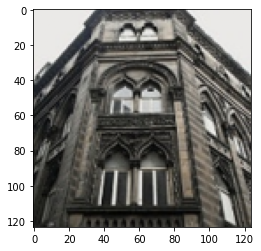

In [117]:
import matplotlib.pyplot as plt
plt.imshow(img)
# batch[0][0].squeeze((1, 1)).shape
# batch[0][0][:, [0,2]] = batch[0][0][:, [2,0]]


In [91]:
from pathlib import Path
from datetime import datetime
ckp_path = "/content/gdrive/MyDrive/Marcel_Moczarski/Data_Science/Google_Services/Local_Drive_Storage/Conda_Envs/Template_Project/checkpoints"

In [26]:
# sample = next(iter(test_dl))
# imgs, targets = sample

In [137]:
from torch.utils.tensorboard import SummaryWriter

In [142]:
best_hist = get_specific_history(Path(setup_config["c_c_ckp_path"]+"/"+"2022-04-15/run_002"), "valid_loss", "parquet", "best")
plot_history_all(best_hist)
